<a href="https://colab.research.google.com/github/partik03-s/no.1_/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean Squared Error: 7.770762041517582
R-squared: 0.9910637083460044
Regression Equation: y = 1.00x + -0.12


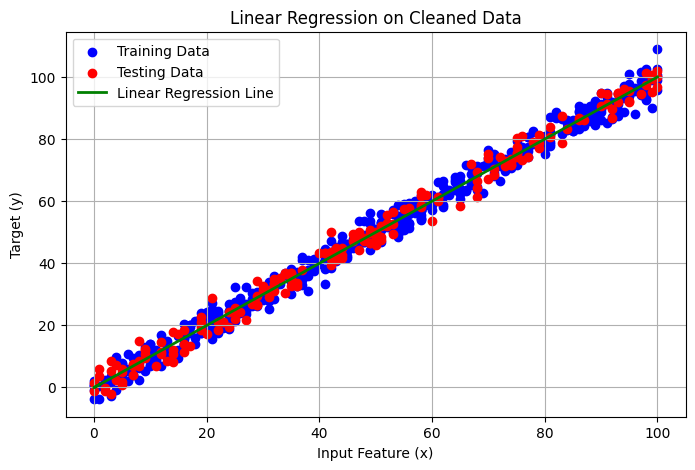

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load data
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)

# Step 2: Drop missing (NaN) values
data.dropna(inplace=True)

# Step 3: Split into input and output
X = data[['x']].values
y = data[['y']].values

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

# Step 5: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predictions and evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Step 7: Print metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print(f"Regression Equation: y = {model.coef_[0][0]:.2f}x + {model.intercept_[0]:.2f}")

# Step 8: Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_test, predictions, color='green', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression on Cleaned Data')
plt.xlabel('Input Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives
    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss

Iteration = 1, Loss = 3902.9407387723245
Iteration = 1, Loss = 1655084603.7246184
Iteration = 1, Loss = 703266345722140.1
Iteration = 1, Loss = 2.9882675136369276e+20
Iteration = 2, Loss = 1.2697526033168174e+26
Iteration = 3, Loss = 5.395339159804974e+31
Iteration = 4, Loss = 2.2925477430237527e+37
Iteration = 5, Loss = 9.741324870174209e+42
Iteration = 6, Loss = 4.139211953820209e+48
Iteration = 7, Loss = 1.758803430435403e+54
Iteration = 8, Loss = 7.473377883092837e+59
Iteration = 9, Loss = 3.1755326386687096e+65
Iteration = 10, Loss = 1.3493239197851212e+71
Iteration = 11, Loss = 5.733447731992367e+76
Iteration = 12, Loss = 2.4362143450864865e+82
Iteration = 13, Loss = 1.0351782405004543e+88
Iteration = 14, Loss = 4.398603069417417e+93
Iteration = 15, Loss = 1.869021991124419e+99
Iteration = 16, Loss = 7.941710466203444e+104
Iteration = 17, Loss = 3.37453306748207e+110
Iteration = 18, Loss = 1.4338817150272872e+116
Iteration = 19, Loss = 6.092744482197962e+121
Iteration = 20, Loss 

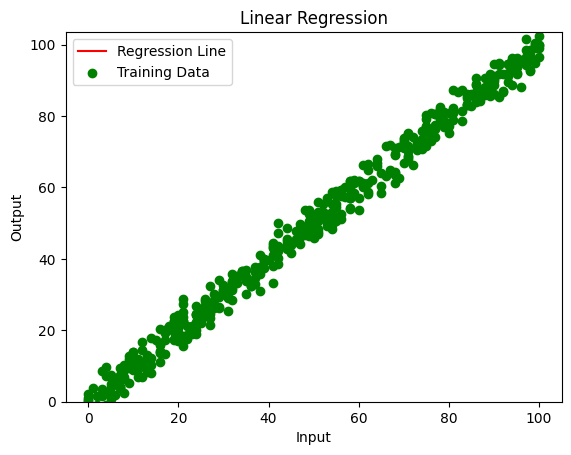

In [15]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.1, 20)